Linear Regression is a Supervised learning algorithm in which target variable is continuous variable

## 1. Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

## 2. Exploring Dataset :- Housing Data

In [2]:
data=pd.read_csv('Housing.csv')

In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# information about all the colums of our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## 3. Visualise Dataset

We have two different data types of features variables
1. Numeric variable
2. Cateorical variable

Visualising Numerical Variables

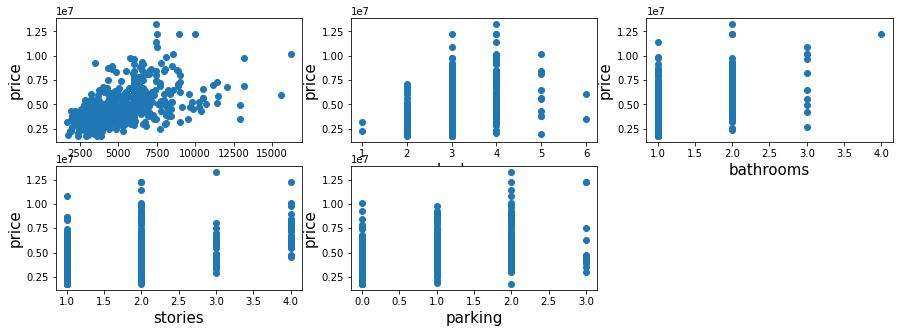

In [5]:
# visaulise the relationship of target variable and numerical variables
numerical_variable=['area','bedrooms','bathrooms','stories','parking']
j=1

plt.figure(figsize=(15,5))
for i in numerical_variable:
    plt.subplot(2,3,j)
    j=j+1
    plt.scatter(data[i],data["price"])
    plt.xlabel(i,fontsize=15)
    plt.ylabel('price',fontsize=15)

Visualising Categorical Variables

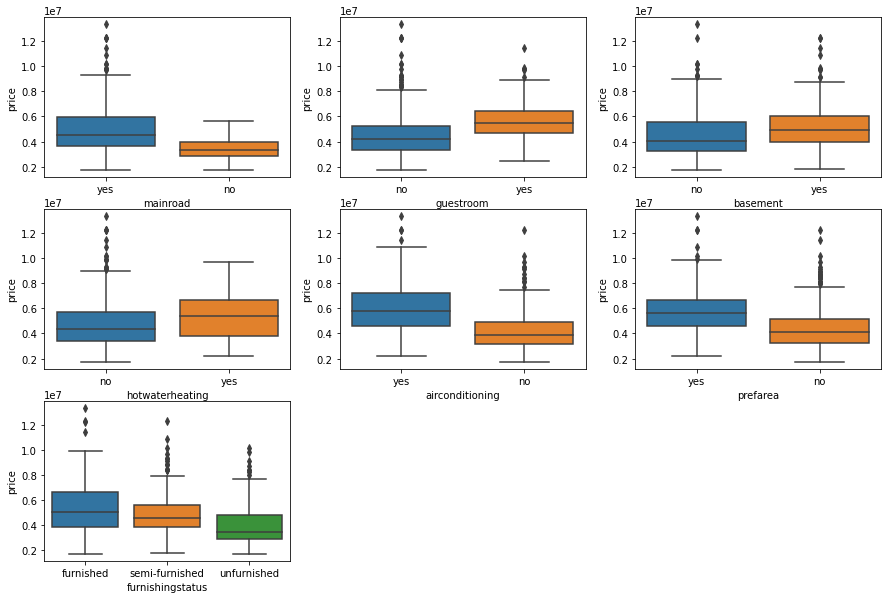

In [6]:
categorical_variable=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']

plt.figure(figsize=(15,10))
j=1
for i in categorical_variable:
    plt.subplot(3,3,j)
    j=j+1
    sns.boxplot(x = i, y = 'price', data = data)

## 4. Data Preparation

We can see we have 6 features having "Yes"/"No" input. To fit our model we need to change these columns to numeric. So we will change "Yes" to 1 and "No" with 0

In [7]:
column_with_yes_no=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

data[column_with_yes_no]=data[column_with_yes_no].replace({'yes':1,'no':0})

In [8]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


We have one more categorical data type column "furnishingstatus". We will create two dummy columns ( because thrid column can be eplained by first two columns ) for it using "get_dummies".

In [9]:
new_columns=pd.get_dummies(data["furnishingstatus"],drop_first=True)

In [10]:
housing_data=pd.concat([data,new_columns],axis=1)

In [11]:
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [12]:
housing_data.drop('furnishingstatus',axis=1,inplace=True)

In [13]:
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


## 5. Data split into Train and Test

In [14]:
X=housing_data[list(set(housing_data.columns)-set('price'))]
y=housing_data['price']

In [15]:
train,test=train_test_split(X,train_size=0.7,random_state=100)

In [16]:
train.shape,test.shape

((381, 14), (164, 14))

Here we can see all the columns except 'area' hae smaller values. So to get unbiased model result its good to do stadardization of columns except for the columns that we changed categorical to numeric( yes/no columns and dummy columns)

In [17]:
from sklearn.preprocessing import MinMaxScaler

numerical_variable = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

train[numerical_variable]=MinMaxScaler().fit_transform(train[numerical_variable])

Checking correlation between columns

In [18]:
train.corr()

,basement,area,prefarea,unfurnished,hotwaterheating,bathrooms,guestroom,parking,price,bedrooms,airconditioning,semi-furnished,stories,mainroad
basement,1.000000,0.106971,0.203933,-0.077562,0.023806,0.120857,0.367345,0.042203,0.200743,0.120618,0.082892,0.049430,-0.155313,0.067937
area,0.106971,1.000000,0.279878,-0.131524,0.037719,0.163446,0.155665,0.365658,0.532025,0.097462,0.215888,-0.040753,0.069274,0.308272
prefarea,0.203933,0.279878,1.000000,-0.078983,-0.074318,0.061584,0.161877,0.081780,0.344543,0.076503,0.099840,0.001157,0.072192,0.191465
unfurnished,-0.077562,-0.131524,-0.078983,1.000000,-0.063025,-0.128192,-0.017198,-0.138313,-0.270114,-0.125921,-0.123584,-0.584683,-0.088199,-0.129101
hotwaterheating,0.023806,0.037719,-0.074318,-0.063025,1.000000,0.112732,0.018394,0.074999,0.141202,0.085818,-0.153801,0.064641,-0.001538,-0.003779
bathrooms,0.120857,0.163446,0.061584,-0.128192,0.112732,1.000000,0.150982,0.138241,0.524246,0.346925,0.228315,0.065987,0.295689,0.031716
guestroom,0.367345,0.155665,0.161877,-0.017198,0.018394,0.150982,1.000000,-0.010240,0.265877,0.089488,0.130300,0.000632,0.068088,0.106875
parking,0.042203,0.365658,0.081780,-0.138313,0.074999,0.138241,-0.010240,1.000000,0.352081,0.120363,0.188132,0.044331,0.009708,0.200389
price,0.200743,0.532025,0.344543,-0.270114,0.141202,0.524246,0.265877,0.352081,1.000000,0.349825,0.433162,0.078917,0.409464,0.319208
bedrooms,0.120618,0.097462,0.076503,-0.125921,0.085818,0.346925,0.089488,0.120363,0.349825,1.000000,0.161890,0.049111,0.419582,0.012655


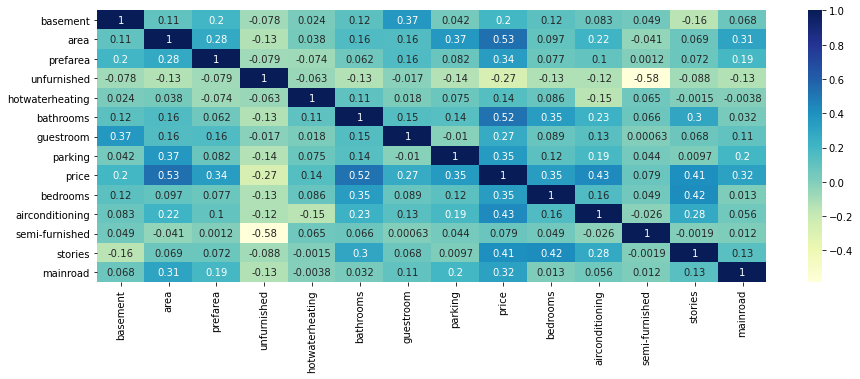

In [19]:
plt.figure(figsize=(15,5))
sns.heatmap(train.corr(),annot=True,cmap='YlGnBu')
plt.show()

We can see correlation between column 'price' and column 'area' is highest. So lets make the univariate model by taking feature column as 'area'.

## 6. Simple Linear Regression

Simple linear regression is a method for predicting a quantitative response using a single feature.

Equation of Simple Linear Regression is:-

y=β0+β1x 

where

β0 s the constant of intercept,

β1 is the coefficient for x,

x is data points,

y is output of each data point(x)

Lets plot the graph between the house's area and it's price.

In [20]:
X_train=train[list(set(train.columns)-set('price'))]
y_train=train['price']

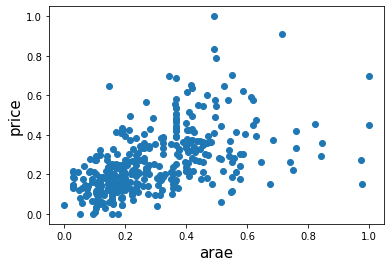

In [21]:
plt.scatter(X_train['area'],X_train['price'])
plt.xlabel('arae',fontsize=15)
plt.ylabel('price',fontsize=15)
plt.show()

Now lets find model coefficient using `Statsmodel`

In [22]:
# add constant
X_train_lm  = sm.add_constant(X_train['area'])

# creating OLS model
lm1= sm.OLS(y_train,X_train_lm).fit()

# parameters
lm1.params.round(5)

const    0.12689
area     0.46219
dtype: float64

Now lets find model coefficient using `Scikit-Learn`

In [23]:
lm2=LinearRegression()

lm2.fit(np.array(X_train['area']).reshape(-1,1),y_train)
print(lm2.intercept_.round(5))
print(lm2.coef_.round(5))

0.12689
[0.46219]


## 7. Use this model for prediction

$y = β0+ β1x$

$y= 0.12689 + 0.46219*x$

Lets take the case if are of any house is 10000 sq foot than the price of that house according of our model would be

$y= 0.12689 + 0.46219*10000 =4622$

In [25]:
lm2.predict(np.array([10000]).reshape(1,-1))

array([4622.04678263])

## 8. Plotting the least square Lines

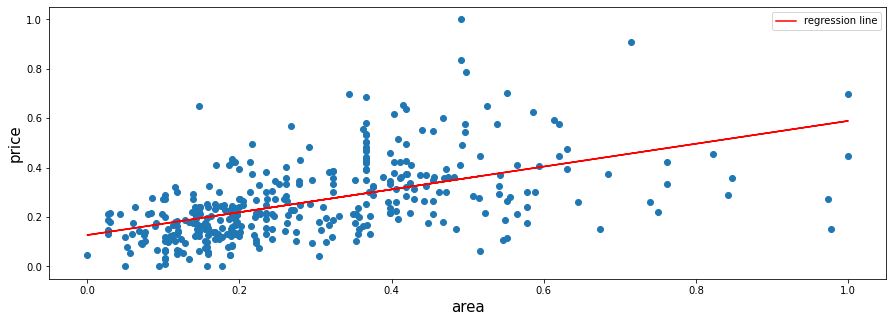

In [26]:
plt.figure(figsize=(15,5))
plt.scatter(X_train['area'],X_train['price'])
plt.plot(X_train_lm.iloc[:, 1], 0.127 + 0.462*X_train_lm.iloc[:, 1],'r',label='regression line')
plt.xlabel('area',fontsize=15)
plt.ylabel('price',fontsize=15)
plt.legend()
plt.show()

In [27]:
lm1.rsquared

0.2830500764266308

In [28]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Sat, 19 Jun 2021   Prob (F-statistic):           3.15e-29
Time:                        22:35:10   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.0

## 9. Residual Analysis

`StastsModel`

In [29]:
y_train_pred=lm1.predict(X_train_lm)

Text(0.5, 0, 'Errors')

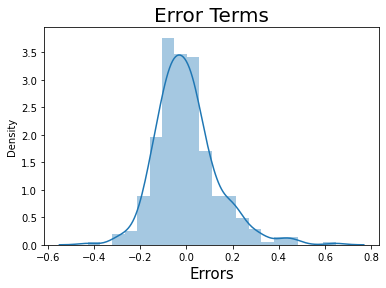

In [30]:
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 15)     

`Scikit-Learn`

In [31]:
y_train_pred=lm2.predict(np.array(X_train['area']).reshape(-1,1))

Text(0.5, 0, 'Errors')

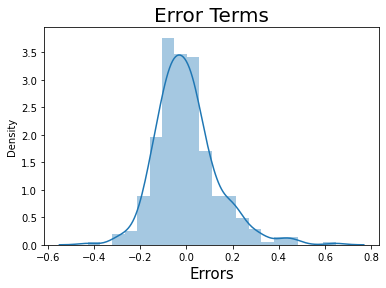

In [32]:
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 15)     

## 10. Making Prediction

In [33]:
from sklearn.preprocessing import MinMaxScaler

numerical_variable = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

test[numerical_variable]=MinMaxScaler().fit_transform(test[numerical_variable])

In [34]:
X_test=test[list(set(test.columns)-set('price'))]
y_test=test['price']

`StatsModel`

In [35]:
X_test_lm=sm.add_constant(X_test['area'])
y_test_pred=lm1.predict(X_test_lm)

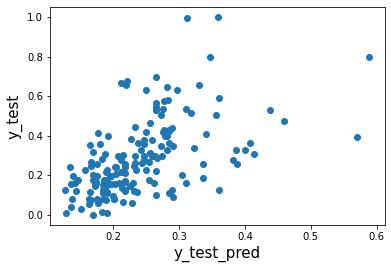

In [36]:
plt.scatter(y_test_pred,y_test)
plt.xlabel('y_test_pred',fontsize=15)
plt.ylabel('y_test',fontsize=15)
plt.show()

In [37]:
print("MAE =",metrics.mean_absolute_error(y_test, y_test_pred))
print("MSE =",metrics.mean_squared_error(y_test, y_test_pred))
print("RMSE =",np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

MAE = 0.12069533510155059
MSE = 0.028092473996349124
RMSE = 0.1676080964522571


`Scikit-Learn`

In [38]:
y_test_pred=lm2.predict(np.array(X_test['area']).reshape(-1,1))

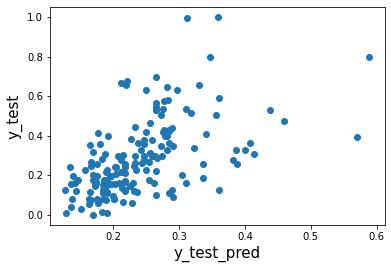

In [39]:
plt.scatter(y_test_pred,y_test)
plt.xlabel('y_test_pred',fontsize=15)
plt.ylabel('y_test',fontsize=15)
plt.show()

In [40]:
print("MAE =",metrics.mean_absolute_error(y_test, y_test_pred))
print("MSE =",metrics.mean_squared_error(y_test, y_test_pred))
print("RMSE =",np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

MAE = 0.12069533510155063
MSE = 0.028092473996349142
RMSE = 0.16760809645225716


## 11. Multiple Linear Regression


Adding all the features to the model

In [41]:
y_train=train.pop('price')
X_train=train

In [43]:
# add constant
X_train_lm  = sm.add_constant(X_train)

# creating OLS model
lm3= sm.OLS(y_train,X_train_lm).fit()

# parameters
lm3.params.round(5)

const              0.02003
basement           0.02159
area               0.23466
prefarea           0.05943
unfurnished       -0.03101
hotwaterheating    0.08486
bathrooms          0.19082
guestroom          0.03043
parking            0.06074
bedrooms           0.04673
airconditioning    0.06688
semi-furnished     0.00092
stories            0.10852
mainroad           0.05044
dtype: float64

In [45]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Sat, 19 Jun 2021   Prob (F-statistic):           8.83e-83
Time:                        22:37:39   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021     

The main difference between adjusted R-squared and R-square is that R-squared describes the amount of variance of the dependent variable represented by every single independent variable, while adjusted R-squared measures variation explained by only the independent variables that actually affect the dependent variable.
